# Study Note - Data Exploration With Kaggle Scripts
<H4>DataCamp Community Open Courses</H4>
Link: https://www.datacamp.com/community/open-courses/data-exploration-with-kaggle-scripts#gs.57aUs7Y

**Open Course Description**

In this course you will begin learning the art and science of data exploration. You'll also become familiar with some of the most widely used visualization packages in data science. You'll get the chance to explore a number of fun & interesting datasets such as the 2013 American Community Survey, pigeon racing data, data on the length of chopsticks and Marijuana prices in the US. After completing the course, you'll be able to upload your first Kaggle Script.

**Bonus Chapter:** Once you have finished your exercises on DataCamp it's time to start building a data science portfolio with your new skills! In this bonus chapter, you'll be given the chance to publish analyses on Kaggle Scripts that you've personalized with information from your own life.
(Basic) Visualize a dataset on US Baby Names to learn the popularity of your name or a friend's name in the USA over the past 100+ years.
(Intermediate) Create a polished analysis in RMarkdown that walks readers through recent changes at the college you attended or would like to attend. You will explore changes in enrollment, tuition, admissions rate, and degree types.
(Advanced) Each of Ben's scripts end with suggestions for creating an even meatier analysis. Which ones can you use to extend your work?
To start each exercise, follow the link to a script that has been created by Kaggle CTO Ben Hamner. Review the code or output to find instructions for creating a custom analysis. Then click Fork on the script to create an editable copy and get started.

**Chapter 1: Analyzing the 2013 American Community Survey**

In this first chapter you will use data from the 2013 American Community Survey to figure out whether it makes sense to pursue a PhD or not. The end result of this chapter will be your own Kaggle script that you can add to your Kaggle account.

**Chapter 2: Pigeons, Chopsticks, Spanish Silver and Marijuana**

Analyze pigeon racing data, discover the optimal size for your chopsticks, plot Spanish silver production in the 18th century and map the average price of marijuana in the different states of the US.

---

## <center> Chapter 1 Analyzing the 2013 American Community Survey</center>

In this first chapter you will use data from the 2013 American Community Survey to figure out whether it makes sense to pursue a PhD or not. The end result of this chapter will be your own Kaggle script that you can add to your Kaggle account.

### Introducing the Amercian Community Survey

In this first chapter you will analyze data of the <a href='https://www.kaggle.com/census/2013-american-community-survey'>2013 American Community Survey (ACS)</a> to find out whether it makes sense to pursue a PhD. The end result will be a <a href='https://www.kaggle.com/martijn/d/census/2013-american-community-survey/data-exploration-with-kaggle'>Kaggle script</a> that you can share with your own Kaggle account.

After binding together the ss13pusa.csv and ss13pusb.csv files that you can find <a href='https://www.kaggle.com/census/2013-american-community-survey'>here</a>, we created a subset containing 300.000 observations and 3 variables: SCHL (School Level), PINCP (Income) and ESR (Work Status). This subset is called ac_survey.

*Note: A basic understanding of the R syntax is required for this course. In addition, you will need to make use of some basic functions in the <a href='https://www.datacamp.com/courses/dplyr-data-manipulation-r-tutorial'>dplyr</a> and <a href='https://www.datacamp.com/courses/data-visualization-with-ggplot2-1'>ggplot2</a> packages.*

- acs_url represents the URL of the .RData file that contains the ac_survey data frame. Use acs_url in combination with load() and url() to import it into R.
- Investigate the first 20 observations of ac_survey using head().

<div class="alert alert-block alert-info" style="margin-top: 20px">

The **American Community Survey** is an ongoing survey from the US Census Bureau. In this survey, approximately 3.5 million households per year are asked detailed questions about who they are and how they live. Many topics are covered, including ancestry, education, work, transportation, internet use, and residency.

The responses reveal a fascinating, granular snapshot into the lives of many Americans.

<hr> *source: https://www.kaggle.com/census/2013-american-community-survey *

</div>

In [17]:
# URL to AC survey data
acs_url <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/ac_survey.RData"

# Import data in .RData file at acs_url
load(url(acs_url))

# Print head of ac_survey
head(ac_survey, n=20)

SCHL,ESR,PINCP
3,NA,NA
21,1,25000
1,NA,NA
21,1,20000
21,1,50000
24,6,600
17,1,327000
4,NA,NA
18,1,12000
19,1,65000


### Preparing your data set for further analysis (Data Cleaning)

Your data still looks a bit messy so it's time to clean it up with data manipulation techniques. You will do this using <b style = "color: skyblue">dplyr</b>, an easy-to-use R package for performing the most common data manipulation tasks.

<b style = "color: skyblue">dplyr</b> makes use of the pipe operator: <b style = "color: orange">%>%</b>. Pipes take the output from one function and feed it to the first argument of the next function. You can even chain operations. The following two commands do the same thing:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<center> tail(head(ac_survey, 20), 5) </center>
<center> ac_survey <b style = "color: orange">%>%</b> head(20) <b style = "color: orange">%>%</b> tail(5) </center>
</div>

This command takes ac_survey, then applies thehead()function with the optional argument 20, then appliestail() with the optional argument 5.

ac_survey that you imported in the previous exercise is already available, as is the small data frame degree_codes.

- Use a chain of piping operators on ac_survey to build **ac_survey_clean**:
  - First, convert ac_survey into a tbl with tbl_df() (already coded for you).
  - Next, remove observations that have NA values with na.omit().
  - Then, keep observations for which SCHL %in% c(21, 22, 24) with filter().
  - Finally, inner_join() with degree_codes to add a more understandable Degree column.
- Print out ac_survey_clean and inspect the result of your work.

<div class="alert alert-block alert-info" style="margin-top: 20px">
**dplyr** <br>
dplyr is the next iteration of plyr, focussed on tools for working with data frames (hence the d in the name). It has three main goals:

Identify the most important data manipulation tools needed for data analysis and make them easy to use from R.

Provide blazing fast performance for in-memory data by writing key pieces in C++.

Use the same interface to work with data no matter where it's stored, whether in a data frame, a data table or database.
<hr>
* Source: 
<li>https://www.rdocumentation.org/packages/dplyr/versions/0.5.0</li>
<li>https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html </li>*
</div>

In [18]:
# Try the example
tail(head(ac_survey, 20), 5)
ac_survey %>% head(20) %>% tail(5)

SCHL,ESR,PINCP
19,1,32000
11,NA,NA
18,6,0
15,6,8400
8,NA,NA


SCHL,ESR,PINCP
19,1,32000
11,NA,NA
18,6,0
15,6,8400
8,NA,NA


In [19]:
# ac_survey and dplyr are available
# Load the dplyr library
library(dplyr)

# data frame that translates SCHL to Degree
degree_codes <- data.frame(SCHL = c(21, 22, 24), 
                           Degree = c("Bachelor", "Masters", "Doctorate"))

# Add code to remove NAs, filter and join
ac_survey_clean <- ac_survey %>% 
  tbl_df() %>% 
  na.omit() %>% 
  filter(SCHL %in% c(21, 22, 24)) %>%
  inner_join(degree_codes)

# Print out ac_survey_clean  
ac_survey_clean

Joining, by = "SCHL"


SCHL,ESR,PINCP,Degree
21,1,25000,Bachelor
21,1,20000,Bachelor
21,1,50000,Bachelor
24,6,600,Doctorate
21,1,85000,Bachelor
21,6,3600,Bachelor
22,6,26200,Masters
21,1,97000,Bachelor
24,1,53000,Doctorate
21,1,45000,Bachelor


<div class="alert alert-block alert-info" style="margin-top: 20px">

<h3 style="color: orange"> ALERT: Package Not Installed </h3>

<hr> **Error message when running the above code**<br>
Error in library(dplyr): there is no package called ‘dplyr’
Traceback:

1. library(dplyr)
2. stop(txt, domain = NA)

<hr> **Solution**<br>
Install the dplyr package by typing the command in RStudio console: install.packages("dplyr").<br>
Install the ggplot2 package in the same manner, to avoid similar error in using ggplot2 library. 


</div>

### How many are there ? - Part One

Let's have a look at the number of BSc, MSc & PhD holders in the US. To do this you need to calculate the number of observations there are for each Degree in ac_survey_clean.

To do create grouped summaries, you can combine group_by() and summarize(), both from the dplyr package.

This command groups ac_survey_clean by Degree, and then calculates the average wage by Degree (try it out in the console!):

<div class="alert alert-block alert-info" style="margin-top: 20px">
ac_survey_clean %>% <br>
  group_by(Degree) %>% <br>
  summarize(avg_wage = mean(PINCP))
  </div>
  
- Use a combination of group_by() and summarize() to create a summary data frame that contains the number of observations for each Degree. You can use the dplyr-specific aggregate function n() (without arguments) to count the number of observations in a group. Call this summary column count. Assign the resulting data frame to degree_holders.
- Print out degree_holders; does the output make sense?

In [23]:
# Run this code if re-run to resolve the conflict between dplyr and plyr
# Error occured ...
detach("package:plyr", unload=TRUE)

ERROR: Error: package ‘plyr’ is required by ‘acs’ so will not be detached


In [24]:
# Try the example
# Calculate the average wage (PINCP) by degree

# group_by() and summarize()
degree_avg_wage <- ac_survey_clean %>% 
group_by(Degree) %>% 
dplyr::summarise(avg_wage = mean(PINCP))

# Print out degree_avg_wage
degree_avg_wage

Degree,avg_wage
Bachelor,56774.01
Doctorate,101237.23
Masters,72021.39


In [25]:
# Calculate the number of observations for each degree

# group_by() and summarize()
degree_holders <- ac_survey_clean %>% 
   group_by(Degree) %>%
   dplyr::summarize(count = n())
  
# Print out degree_holders
degree_holders  

Degree,count
Bachelor,40561
Doctorate,3000
Masters,17680


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3 style="color: orange"> ALERT: Conflict between two packages </h3>
<hr>
** Error **<br><br>
I encountered an error and an unexpected output when re-run the R code from the beginning. 
<li>Unexpected output of running summarise() function, which returns the summarized value of all rows instead of by each group. </li>
<li>Error in n(): This function should not be called directly</li>

<hr>
** Solution ** <br><br>
After running the entire code in this notebook, I have dplyr and plyr loaded in the same session. Both dplyr and plyr have the functions summarise/summarize. There is a conflict between plyr and dplyr. To fix this conflict, run this command to unload the plyr package.
<center> **detach("package:plyr", unload=TRUE) **</center>
However, to avoid confusions with masking functions, it is clear to use the "package::function" specification, like example below:
<center> **dplyr::summarise() **</center>
Then the code can continue to run as expected.

<hr>
Source: http://stackoverflow.com/questions/22801153/dplyr-error-in-n-function-should-not-be-called-directly
</div>

### How many are there? - Part Two

<i style = "background-color: yellow">degree_holders</i> contains the number of BSc, MSc & PhD holders in the US. In this exercise you will visualize this data using a <b style = "color: skyblue">ggplot2</b> plot. If you're not yet familiar with the ggplot2 syntax, check our <a href='https://www.datacamp.com/courses/data-visualization-with-ggplot2-1'>interactive tutorial</a>.

ggplot2's emphasis is on rapidly and easily visualizing your data for exploration and reporting using the grammar of graphics. A visualization will often help you to get to insights faster, and will make it easier to communicate your results with your peers.

Let's make a simple barplot with the number of Bachelors/Masters/Phd's in the US on the y-axis and the different degrees on the x-axis.

- Load the ggplot2 package.
- ggplot() takes two main arguments: the dataset, degree_holders, and a function aes(): the aesthetics that will map your variables to the various parts of the plot (x-axis, y-axis, color of the bars, etc). Finish the command:
    - Inside aes() map Degree onto x, count onto y and Degree onto fill.
    - Specify stat = "identity" inside geom_bar().
    - Make sure you give the axes appropriate titles! Label the x-axis with "Degree" and the y-axis with "No of People".
    - Title the graph "Comparing Degree Holders in the US".

<div class="alert alert-block alert-info" style="margin-top: 20px">
**ggplot2** <br>

ggplot2 is a plotting system for R, based on the grammar of graphics, which tries to take the good parts of base and lattice graphics and none of the bad parts. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends) as well as providing a powerful model of graphics that makes it easy to produce complex multi-layered graphics.


<hr>
* Source: 
<li>http://ggplot2.org/</li>
<li>http://ggplot2.org/resources/2007-past-present-future.pdf</li>*
</div>

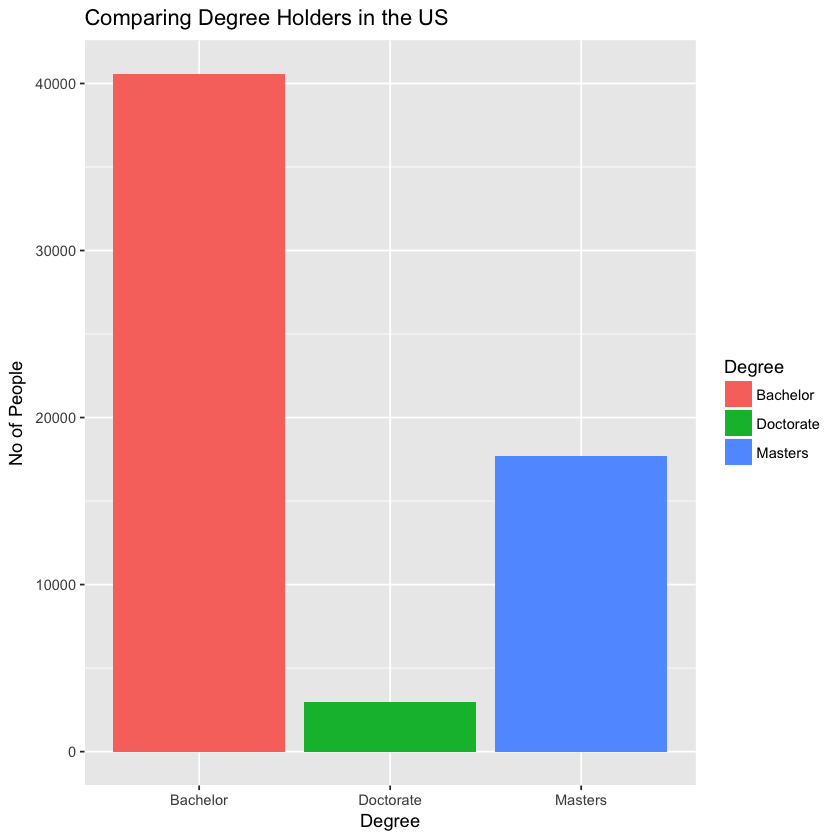

In [26]:
# Load the ggplot2 package
library(ggplot2)

# Visualize the number of Bachelor, Master and PhD holders   
ggplot(degree_holders, aes(x = Degree, y = count, fill = Degree)) +
  geom_bar(stat = "identity") +
  xlab("Degree") + 
  ylab("No of People") + 
  ggtitle("Comparing Degree Holders in the US")

### Do PhD's earn more?

In this final exercise, you will find out whether it's a smart career choice (money-wise) to pursue a PhD. To make this analysis feasible, a data frame income is provided. It was created by 5000 times taking a random sample of 1000 observations from The American Community Survey. For each sample min(), max(), median(), and IQR() are calculated. Now you can create 3 boxplots based on median income for each degree level so you can compare the wages for different degrees.

Once you've solved this final exercise, you can download your very first Kaggle script in R Markdown format. R Markdown is an authoring format for reproducible documents, presentations, and reports containing R code. Every R markdown file can automatically regenerated whenever underlying R code or data changes.

- Finish the ggplot() command so that Degree is mapped onto x and fill and MedianIncome is mapped onto y. You don't have to label the x- and y-axes, but make sure to include a title: "Comparing Income of Degrees Holders".

In [30]:
# This is a pre-executed code in the DataCamp Course
# I copy&paste the codes here to support the proper execution of the next section which requires the use of income variable

# Take 5000 random samples of 1000 observations & calculate median income
over_thousand <- ac_survey_clean %>%
  filter(PINCP > 1000) %>% # exclude obserations with income under 1000
  group_by(Degree) 
    
freq <- 5000 # 5000 samples
income <- NULL
for (i in 1:freq) {
  # Select 1000 observations
  sample <-  sample_n(over_thousand, 1000)
  
  # Calculate stats by degree
  sample_stats <- dplyr::summarise(sample, 
                            MinIncome = min(PINCP), 
                            MaxIncome = max(PINCP),
                            MedianIncome = median(PINCP),
                            IncomeRange = IQR(PINCP))
  
  income <- rbind(income, sample_stats)
}

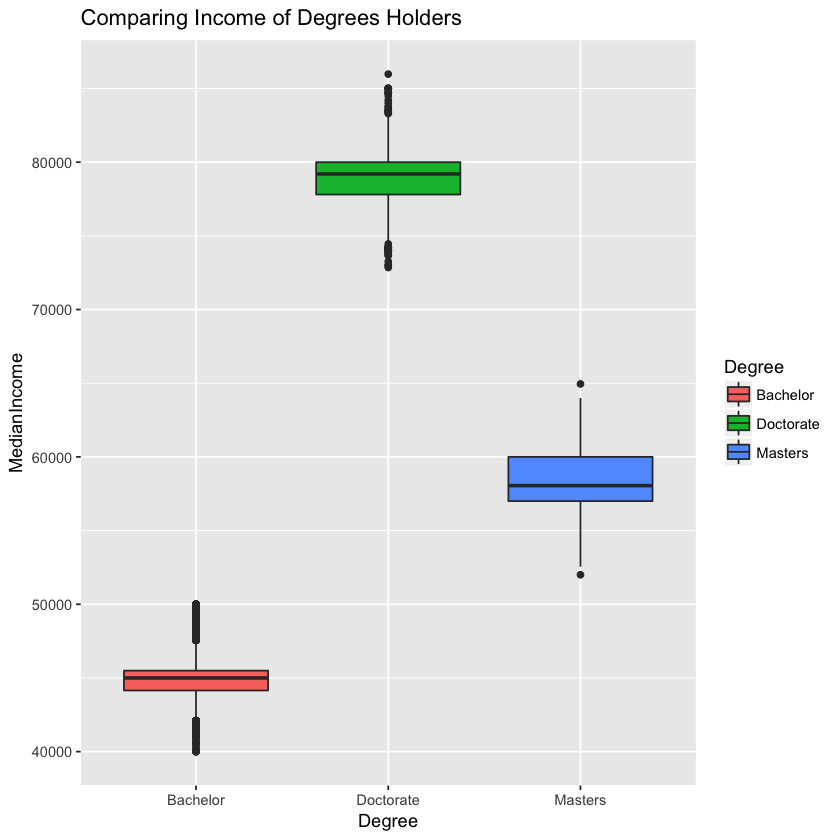

In [31]:
# Create the boxplots
ggplot(income, aes(x = Degree, y = MedianIncome, fill = Degree)) +  
  geom_boxplot() +
  ggtitle("Comparing Income of Degrees Holders")

<div class="alert alert-block alert-info" style="margin-top: 20px">
Well done! Now it's time to upload your Kaggle script. First you need to <a href='https://s3.amazonaws.com/assets.datacamp.com/production/course_835/scripts/my_first_kaggle_script.Rmd'>download your Kaggle Script</a>. Next you want to go to the <a href='https://www.kaggle.com/census/2013-american-community-survey'>American Community Survey</a> Page and click NEW SCRIPT. Use the dropdown menu to change the language to RMarkdown. Paste your R Markdown document, press run and see how your first Kaggle script is coming to life!

<hr>
<b style="color: orange">ALERT: it's very slow to run the R Markdown script on Kaggle.</b>
</div>

## <center> Chapter 2 Pigeons, Chopsticks, Spanish Silver and Marijuana </center>

Analyze pigeon racing data, discover the optimal size for your chopsticks, plot Spanish silver production in the 18th century and map the average price of marijuana in the different states of the US.

### Looking at pigeon data

In this second chapter you will analyze some truly unique data sets.

The <a href='http://www.pigeon.org/'>American Racing Pigeon Union</a> has a great database of race results. A subset of this data is available in a data frame pigeon, that's available in your workspace.

A first thing you'll do with this data, is investigating whether flying speed is related to the color of the pigeons' feathers. Next, you'll use ggplot2 to create a plot of the pigeon's speed against their position.

- Have a look at the chained set of dplyr functions. The first part retains pigeons with a Color that appears at least 10 times in the dataset. Finish the final group_by() and summarize() calls to calculate the average Speed, grouped per Color. The resulting data frame should have two columns: Color and AvgSpeed. Simply print out this data frame.
- Finish the ggplot() command:
    - Map Pos onto x and Speed onty y.
    - Label the x-axis with "Rank" and the y-axis with "Pigeon Speed".
    - Finish off by adding the title "The correlation between speed and rank".

In [ ]:
# Load the data
load(url("http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/pigeon.RData"))

In [ ]:
# pigeon is pre-loaded

# Load required packages
library(dplyr)
library(ggplot2)

# Finish the chain of dplyr functions
pigeon %>% 
  group_by(Color) %>% 
  summarize(count = n()) %>% 
  filter(count > 10) %>%
  inner_join(pigeon) %>%
  group_by(Color) %>%
  summarise(AvgSpeed = mean(Speed))

# Plot Speed against Pos
ggplot(pigeon, aes(x = Pos, y = Speed)) +
  geom_point() + 
  xlab("Rank") +
  ylab("Pigeon Speed") +
  ggtitle("The correlation between speed and rank")

### Assessing chopsticks effectiveness

In a study named <a href='https://www.ncbi.nlm.nih.gov/pubmed/15676839'>An Investigation for Determining the Optimum Length of Chopsticks </a>researchers set out to determine the optimal length for chopsticks. One of the criteria to measure chopstick performance is food pinching efficiency (the number of peanuts picked up and placed in a cup).

The workspace contains the chopstick dataset, with 186 observations (different trials) and 2 variables: pinching_eff, the pinching efficiency, and chopstick_length, the lenght of the chopsticks used in the trial. Can you use your ggplot2 skills to create a visualization and and turn this data into easy accessible information? ggplot2 is already loaded for you, so you can get started right away!

- Finish the ggplot() command: - Map pinching_eff onto x and chopstick_length onto fill. - Set the transparency of the density plots to 0.3 with alpha = 0.3. - Label the x-axis with "Food Pincing Eficiency" and the y-axis with "Relative Frequency".

In [ ]:
# Load the data
load(url("http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/chopstick.RData"))

In [ ]:
# Don't have access to the chopstick dataset
# Finish the ggplot() command
ggplot(chopstick, aes(x = pinching_eff, fill = chopstick_length)) +
  geom_density(alpha = 0.3) + 
  xlab("Food Pincing Efficiency") + 
  ylab("Relative Frequency")

### The Spanish silver production

Luckily for us data wizards, the Spaniards kept very detailed records on how much silver they were producing during the colonial era (1720 - 1800). Let's explore their efficiency over the years using some visualizations.

You'll be working with the silver data frame, that's available in your workspace. It contains 81 observations (1 for each year between 1620 and 1800) and two variables: year and silver_minted. You'll create two graphs: the first one shows the amount of minted silver over time. The second one shows the cumulative amount of silver minted year of year.

- Finish the first ggplot() command to plot the amount of silver minted each year:
    - Map year onto x and silver_minted onto y.
    - Inside geom_area(), set alpha = 0.3.
- Edit the command that adds a column cum_silver_minted to silver. Use cumsum() on the silver_minted column of silver.
- Finish the second ggplot() command to plot the cumulative amount of silver minted over time:
    - Map year onto x and cum_silver_minted onty y.
    - Inside geom_area(), set the alpha to 0.5.

In [ ]:
# Load the data
load(url("http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/silver.RData"))

In [ ]:
# Silver minted over time
ggplot(silver, aes(x = year, y = silver_minted)) + 
  geom_area(alpha = 0.3)

# Add cum_silver_minted column to silver
silver$cum_silver_minted <- cumsum(silver$silver_minted)

# Cumulative silver minted over time
ggplot(silver, aes(x = year, y = cum_silver_minted)) + 
  geom_area(alpha = 0.5)

### Price differences in high quality marijuana per state

For this final exercise, we're going to investigate data from this repository of historical marijuana prices. A data frame <a href='https://github.com/frankbi/price-of-weed'>weed</a> is availabe in your workspace. It has more than 20.000 obserations and 2 variables: ***state and price***.

As a first step, you'll again have to use some dplyr magic to get average weed prices per state. Next, you can use the <a href='https://www.rdocumentation.org/packages/choroplethrMaps/versions/1.0.1'>choroplethrMaps</a> package to map the weed prices per state. More specifically, you'll use <a href='https://www.rdocumentation.org/packages/choroplethr/versions/3.5.3/topics/state_choropleth'>state_choropleth()</a>: it takes a data frame with two columns: region and value. Being able to link information to particular geographic locations can be very insightful and will help you to reveal hidden knowledge.

All packages you need are loaded, so you can start coding straight away!

- Fill in the group_by() and summarise() commands to create a data frame avg_weed with average weed prices per state. avg_weed should contain two columns: state and avg_price.
- Change the column names of avg_weed to c("region", "value") so they can be used by the state_choropleth() function.
- Now that avg_weed has the correct column names, go ahead and call state_choropleth() on it. Still inside state_choropleth(), specify the title to be "Average Weed Price Per State" and legend to be "Price in $".

<div class="alert alert-block alert-info" style="margin-top: 20px">
Install choroplethrMaps package in the RStudio console: install.packages("choroplethr")
<hr>
Source: https://github.com/trulia/choroplethr

In [32]:
# Load the data
load(url("http://s3.amazonaws.com/assets.datacamp.com/production/course_835/datasets/weed.RData"))

In [33]:
# View the characteristics of the original dataset
names(weed)
head(weed)
dim(weed)
summary(weed)

[1] "State"  "HighQ"  "HighQN" "MedQ"   "MedQN"  "LowQ"   "LowQN"  "date"

State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
California,248.78,12096,193.56,12812,192.92,778,2014-01-01
Colorado,236.31,2161,195.29,1728,213.50,128,2014-01-01


[1] 22899     8

        State           HighQ           HighQN           MedQ      
 Alabama   :  449   Min.   :202.0   Min.   :   93   Min.   :144.8  
 Alaska    :  449   1st Qu.:303.8   1st Qu.:  597   1st Qu.:215.8  
 Arizona   :  449   Median :342.3   Median : 1420   Median :245.8  
 Arkansas  :  449   Mean   :329.8   Mean   : 2275   Mean   :247.6  
 California:  449   3rd Qu.:356.6   3rd Qu.: 2958   3rd Qu.:274.2  
 Colorado  :  449   Max.   :415.7   Max.   :18492   Max.   :379.0  
 (Other)   :20205                                                  
     MedQN            LowQ           LowQN                date      
 Min.   :  134   Min.   : 63.7   Min.   :  11.0   2013-12-27:   51  
 1st Qu.:  548   1st Qu.:147.1   1st Qu.:  51.0   2013-12-28:   51  
 Median : 1320   Median :186.8   Median : 139.0   2013-12-29:   51  
 Mean   : 2184   Mean   :203.7   Mean   : 202.8   2013-12-30:   51  
 3rd Qu.: 2673   3rd Qu.:221.4   3rd Qu.: 263.0   2013-12-31:   51  
 Max.   :22027   Max.   :734.6   Max.   :1

In [34]:
# Load the library
library(dplyr)
library(ggplot2)
library(choroplethrMaps)
library(choroplethr)

In [35]:
# Prepare the dataset for the task, use "HighQ" column as the price
weednew <- weed[,c('State', 'HighQ')]
colnames(weednew) <- c('state', 'price')
dim(weednew)
summary(weednew)
head(weednew)

[1] 22899     2

        state           price      
 Alabama   :  449   Min.   :202.0  
 Alaska    :  449   1st Qu.:303.8  
 Arizona   :  449   Median :342.3  
 Arkansas  :  449   Mean   :329.8  
 California:  449   3rd Qu.:356.6  
 Colorado  :  449   Max.   :415.7  
 (Other)   :20205                  

state,price
Alabama,339.06
Alaska,288.75
Arizona,303.31
Arkansas,361.85
California,248.78
Colorado,236.31


In [36]:
head(weednew, n=20)

state,price
Alabama,339.06
Alaska,288.75
Arizona,303.31
Arkansas,361.85
California,248.78
Colorado,236.31
Connecticut,347.90
Delaware,373.18
District of Columbia,352.26
Florida,306.43


In [37]:
length(unique(weednew$state))

[1] 51

In [52]:
# Get the average price per state
avg_weed <- weednew %>% 
  group_by(tolower(state)) %>%    # Lower case the state names, refer to the ALERT below
  dplyr::summarise(avg_price = mean(price))

head(avg_weed)
dim(avg_weed)

tolower(state),avg_price
alabama,339.5618
alaska,291.4820
arizona,300.6675
arkansas,348.0561
california,245.3761
colorado,238.9187


[1] 51  2

In [47]:
# Understand the choroplethMap
# Attention: the default state name in choropleth package is lower case!!!
?state.map
?state_choropleth
?state.regions
data(state.regions)
head(state.regions)

region,abb,fips.numeric,fips.character
alaska,AK,2,02
alabama,AL,1,01
arkansas,AR,5,05
arizona,AZ,4,04
california,CA,6,06
colorado,CO,8,08


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3 style="color: orange"> ALERT: Case Sensitive </h3>
<hr>
** Error **<br><br>
I encountered an error when running the state_choropleth() function in this notebook (without pre-loaded codes in DataCamp workspace). 
<li>Warning message in super$initialize(map.df, user.df):
“Your data.frame contains the following regions which are not mappable: Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming” </li>
<li> Error in approx(cum, xx, xout = (1:g) \* nnm/g, method = "constant", rule = 2, : zero non-NA points </li>


<hr>
** Solution ** <br><br>
The default state name in choropleth package is lower case. Use **"tolower()"** function to convert the state name to lower case. 

<hr>
Source: 
<li>https://www.rdocumentation.org/search?q=state.region </li>
<li>data(state.regions) | head(state.regions) </li>
</div>

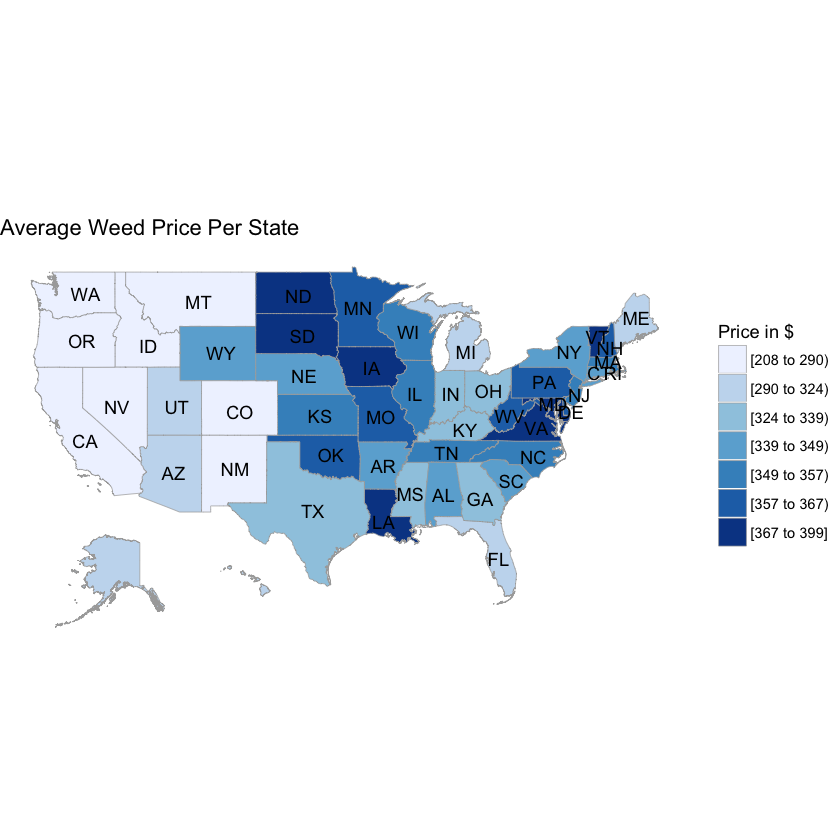

In [62]:
# Update column names
colnames(avg_weed) <- c('region', 'value')
  
# Create a choropleth map
state_choropleth(avg_weed, title = 'Average Weed Price Per State', legend = 'Price in $')

<div class="alert alert-block alert-info"  style="margin-top: 20px">
<h2 style="color:orange"> state_choropleth</h2> <hr>

**Create A Choropleth Of US States** <br>
The map used is state.map in the package choroplethrMaps. See state.regions in the choroplethrMaps package for a data.frame that can help you coerce your regions into the required format.

<br><br>
**Usage**<br>
state_choropleth(df, title = "", legend = "", num_colors = 7, zoom = NULL, reference_map = FALSE)

<br><br>
**Arguments**<br>
**df**
A data.frame with a column named "region" and a column named "value". Elements in the "region" column must exactly match how regions are named in the "region" column in state.map.
<br>
**title**
An optional title for the map.
<br>
**legend**
An optional name for the legend.
<br>
**num_colors**
The number of colors on the map. A value of 1 will use a continuous scale. A value in [2, 9] will use that many colors.
<br>
**zoom**
An optional vector of states to zoom in on. Elements of this vector must exactly match the names of states as they appear in the "region" column of ?state.regions.
<br>
**reference_map**
If true, render the choropleth over a reference map from Google Maps.

<hr>
Source:https://www.rdocumentation.org/packages/choroplethr/versions/3.5.3/topics/state_choropleth
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<center>** THE END **</center> <hr>
Congrats! Now it is time to start building a data science portfolio with your new skills. The following exercises give you the chance to publish analyses on Kaggle Scripts that you have personalized with information from your own life: 
<br><br>
<li> <a href='https://www.kaggle.com/benhamner/d/kaggle/us-baby-names/babies-named-benjamin-over-time'>Visualize a dataset on US Baby Names to learn the popularity of your name or a friend’s name in the USA over the past 100+ years.</a> </li>
<li> <a href='https://www.kaggle.com/benhamner/d/kaggle/college-scorecard/exploring-your-college-duke-university'>Create a polished analysis in RMarkdown that walks readers through recent changes at the college you attended or would like to attend. You will explore changes in enrollment, tuition, admissions rate, and degree types.</a> </li>

<br>To start each exercise, follow the link to a script. Review the code or output to find instructions for creating a custom analysis. Then click Fork on the script to create an editable copy and get started.
</div>

<hr>
### About the Author:  
This is Yimeng's study note on the DataCamp Community Open Course: <a href='https://www.datacamp.com/community/open-courses/data-exploration-with-kaggle-scripts'>Data Exploration with Kaggle Scripts</a>. 

**Study Period: March 13th, 2017**

<hr> 
Copyright &copy; 2017